<a href="https://colab.research.google.com/github/Afvanie/PCVK_Genap_2023/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Gamma Correction pada citra 
Masukkan nilai Gamma: 3


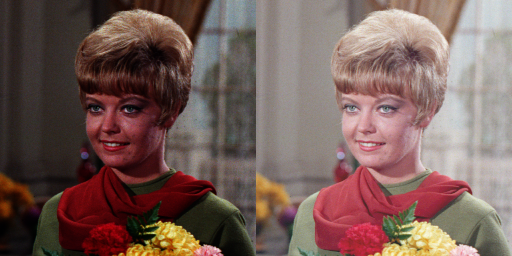

In [ ]:
print('=============================') 
print(' Gamma Correction pada citra ') 
print('=============================') 
try: 
 gamma = int(input('Masukkan nilai Gamma: ')) 
except ValueError: 
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)
#----------------------------------------------#
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Bit Depth pada Citra 
Masukkan nilai Bit Depth: 3


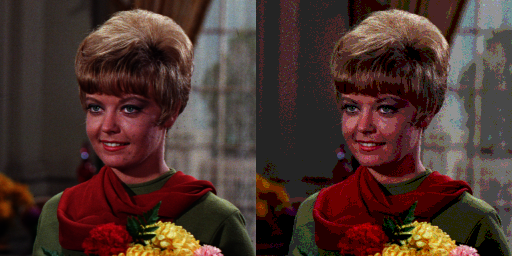

In [ ]:
print('======================') 
print(' Bit Depth pada Citra ')
print('======================') 
try:
  bit_depth = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bit_depth
level = 255/(bit-1)

bit_depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      bit_depth_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

In [ ]:
import glob
from math import log10, sqrt

In [ ]:
print('===============================')
print(' Average Denoising 5 Citra ')
print('===============================')

img_amt = 5

def PSNR(ori, compressed):
    mse = np.mean((ori - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse

ori = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
denoising_avg = np.zeros(ori.shape, ori.dtype)

cv_img = []
for i in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(i)
    cv_img.append(n)

denoising_avg = np.mean(cv_img[:img_amt], axis=0).astype(np.uint8)

psnr_value, mse_value = PSNR(ori, denoising_avg)
print(f"Nilai PSNR: {psnr_value:.2f} dB")
print(f"MSE: {mse_value:.2f}")

final_frame = cv.hconcat((ori, denoising_avg))
cv2_imshow(denoising_avg)

 Average Denoising 5 Citra 
Nilai PSNR: 29.12 dB
MSE: 79.58


error: ignored

**TUGAS PRAKTIKUM**

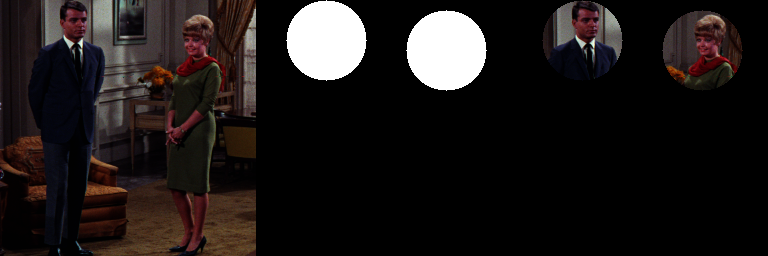

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
masking = np.zeros(original.shape, dtype=np.uint8)
masking = cv.circle(masking, (70, 40), 40, (255,255,255), -1)

result = original & masking

masking1 = cv.circle(masking, (190, 50), 40, (255,255,255), -1)

result = original & masking1

final_frame = cv.hconcat((original, masking, result))
cv2_imshow(final_frame)

OPERASI OR

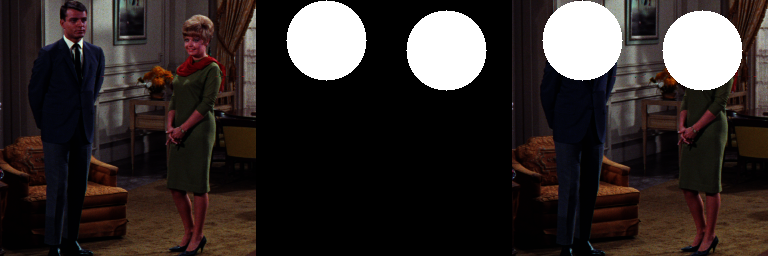

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

masking = np.zeros(original.shape, dtype=np.uint8)
masking = cv.circle(masking, (70, 40), 40, (255,255,255), -1)

result = original | masking 

masking1 = cv.circle(masking, (190, 50), 40, (255,255,255), -1)

result = original | masking1 

final_frame = cv.hconcat((original, masking, result))
cv2_imshow(final_frame)

OPERASI NOT

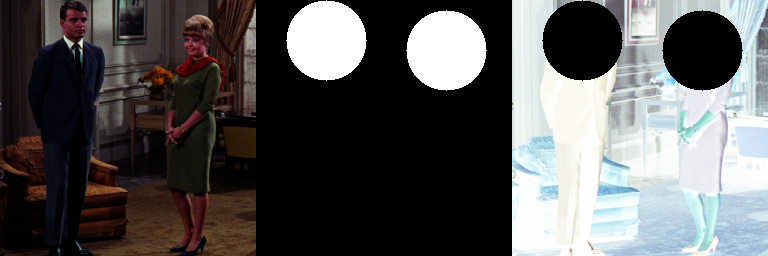

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

masking = np.zeros(original.shape, dtype=np.uint8)
masking = cv.circle(masking, (70, 40), 40, (255,255,255), -1)

result = ~original & ~masking  

masking1 = cv.circle(masking, (190, 50), 40, (255,255,255), -1)

result = ~original & ~masking1 

final_frame = cv.hconcat((original, masking, result))
cv2_imshow(final_frame)

OPERASI NAND

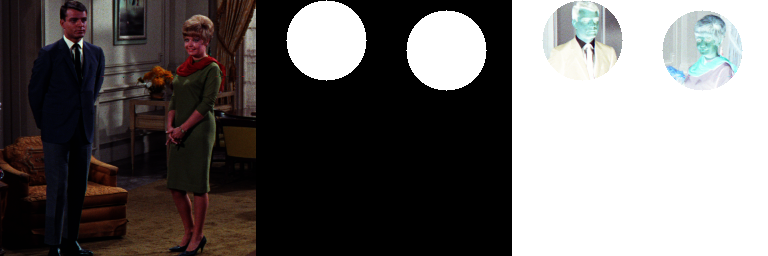

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

masking = np.zeros(original.shape, dtype=np.uint8)
masking = cv.circle(masking, (70, 40), 40, (255,255,255), -1)

result = ~(original & masking)  

masking1 = cv.circle(masking, (190, 50), 40, (255, 255, 255), -1)

result = ~(original & masking1) 

final_frame = cv.hconcat((original, masking, result))
cv2_imshow(final_frame)

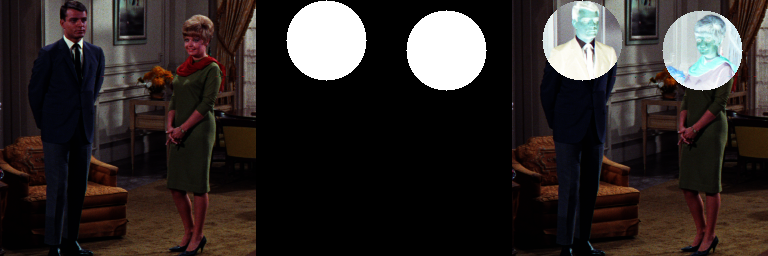

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

masking = np.zeros(original.shape, dtype=np.uint8)
masking = cv.circle(masking, (70, 40), 40, (255, 255, 255), -1)
# operasi XOR
result = original ^ masking  

masking1 = cv.circle(masking, (190, 50), 40, (255, 255, 255), -1)

result = original ^ masking1  

final_frame = cv.hconcat((original, masking, result))
cv2_imshow(final_frame)